# Setup code and common functions

This section contain common functions used throughout the exercise.  

In [ ]:
# Setup code and common functions
from IPython.display import Markdown, display
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from matplotlib import image as mimage
from skimage import color
import os
import shutil

def printmd(string):
    display(Markdown(string))

def printHorizontalRule():
  printmd("---")

def make_file_name(file_name, colors):
  return file_name + "_k" + str(colors) + ".png"

def get_file_size(filename):
  return os.path.getsize(filename) / 1024

imagepath = 'quantizedImages'

# Create output directory for processed images
if not os.path.exists(imagepath):
    os.makedirs(imagepath)


# **Part II - Color Quantization**

---

## **Assignment Instructions**

In this part, you will use unsupervised learning to reduce the number of color points in an image.  This application is also referred to as _color quantization_.  You are free to use any suitable library or package, but you have to clearly specify the name an dinstallation instructions in the README file.

## **Approach**

**sklearn.cluster.KMeans** from **scikit-learn** was used to reduce the number of colors in use by multiple images, which resulted in various degrees of image degradation and reduced file sizes.

Three files were retrieved from the [website](http://www.utdallas.edu/~axn112530/cs6375/unsupervised/images) provided in the homework instructions.

* image1.jpg
* image2.jpg
* image5.jpg

These files are provided in JPEG format but they are converted to PNG files, internally, for the purpose of this assignment. JPEG files use lossy compression and the size of the file depends on which compressor is used and the internal parameters used to save the file.  Simply loading and saving a JPEG file, without any modifications can result in an output file that is a different size from the input file.  

Part of the output of this assignment is to compare the size or each image before and after applying _color quanitization_.  This can be difficult when using JPEG format because of the issues with compression so, in order to get consistent results, the input files will be converted to PNG which provides for a more consistent size based on quality of image. This ensure that there is more of an 'apples-to-apples' comparison of the final results.


## **Results**

The results of applying _color quantization_ to the test files are provided in the table below.


|  Image |  Original File Size | Value of k used  | Image Quality  | Image Size  |
|---|---|---|---|---|
|  Image 1 |  2,141K       | 2 | grainy and low quality.  Appears black and white  | 118K  |
|  Image 1 |  2,141K | 8     | Distinct color banding in the sky    | 427K  |
|  Image 1 |  2,141K    | 64     | Visually close to original but still has noticeable degradation    | 1,345K |
|  Image 2 |  2,810K       | 2     | Low quality, much of the 'red' has blended together.   | 39K  | 
|  Image 2 |  2,810K       | 8 | Decent image quality     | 166K |
|  Image 2 |  2,810K       | 64 | Visually close to original     | 950k |
|  Image 5 |  2,272K       | 2 | Dark with low quality.  Still maintains multiple colors.     | 68K |
|  Image 5 |  2,272K       | 8 | Image degraded but it's an interesting effect.     | 225K |
|  Image 5 |  2,272K       | 64 | Visually close to original     | 685K |




# Image Processing Functions

This section contains functionality to retrieve, compress, plot, and save images.  The primary function is _quantize()_, described below.

Images are retrieve, at runtime, from the UTD linke provided for the homework assignment.  The images are saved in PNG format after being downloaded.  As each image is processed it will be plotted and saved to the colab space as a .PNG file.  The file is saved as a .PNG so that the application can get an accurate size of each quantized image.

* quantize() - Processes an image contained in an ndarray and reduces the number of colors in the image using **sklearn.cluster.KMeans**.


In [ ]:
utdroot = "https://personal.utdallas.edu/~axn112530/cs6375/unsupervised/images/"

# quantize will accept an image in an ndarray and 
# reduce the color palatte of the image using sklearn.cluster.KMeans
#
# Inputs:
#  img - an ndarray object containing image data
#  num_colors - an integer that specifies the number of colors to reduce the image to.
#           This is the k-value input to the KMeans model.
#
# Output:
#  An ndarray object containing the compressed image after applying kmeans
def quantize(img, num_colors):
  # Modify the original img array so that it can be more easily processed using KMeans.
  sample_size = 10000
  rgb = np.reshape(img, (-1, 4)) / 255

  # Create training data for the model and 
  train = shuffle(rgb, random_state=0)[:sample_size]
  model = KMeans(n_clusters=num_colors, random_state=0, n_init=10, max_iter=300, n_jobs=10, algorithm='auto')
  kmeans = model.fit(train)

  # Recreate the original image using the clusters produced by the KMeans algorithm
  labels = kmeans.predict(rgb)
  centers = kmeans.cluster_centers_
  return np.reshape(centers[labels], img.shape)

# This will download an image from the UTDallas website.  This is a raw
# JPEG image but it will be converted to a PNG to simplify analysis.
#
# Inputs:
#  image_name - The root name, without extension, of a file to process from the UTD
#               site.
# Output:
#  An ndarray object containing the original image downloaded from UTD
def download_original_image(image_name):
  imagecontents = io.imread(utdroot + image_name + '.jpg')

  # Save a copy of the images as a PNG for comparison
  png_file_name = image_name + ".png"
  io.imsave(png_file_name, imagecontents)

  fsize = get_file_size(png_file_name)
  printmd(f"## Original image {png_file_name}. File size {fsize:,.0f}K")
  return imagecontents

# Compress the image using the maximum number of colors provided.
# A copy of the image is saved
#
# Inputs:
#  image_name - The name of the image being processed
#  imagecontents - An ndarray containing the contents of the image to be compressed
#  num_colors - The max number of colors that the resulting image should use
#
# Output:
#  An ndarray object containing the compressed image
def compress_image(image_name, imagecontents, num_colors):
  compressed = quantize(imagecontents, num_colors)
  compressed_file_name = make_file_name(image_name, num_colors)
  io.imsave(compressed_file_name, compressed)
  return compressed, get_file_size(compressed_file_name)

# Compress an image and display it using matplotlib
#
# Inputs:
#  image_name - The name of the image being processed
#  original_image - An ndarray containing the contents of the original image
#  num_colors - The max number of colors that the resulting image should use
#
# Output:
#  None
def compress_and_show_image(image_name, original_image, num_colors):
  compressed_image, compressed_image_size = compress_image(image_name, original_image, num_colors)
  filesize = get_file_size(make_file_name(image_name, num_colors))
  printmd(f"## Compressed image {image_name}.png. k={num_colors}. File size {filesize:,.0f}K")
  plt.imshow(compressed_image)
  plt.show()
  return compressed_image_size

def process_image(image_name):
  original_image = download_original_image(image_name)
  plt.imshow(original_image)
  plt.show()

  # Compress image using different numbers of colors
  compress_and_show_image(image_name, original_image, 2)
  compress_and_show_image(image_name, original_image, 8)
  compress_and_show_image(image_name, original_image, 64)


# Image Processing

This section is where the actual image processing is done.  Each of the three images, image1, image2, and image5, are processed using a **kmeans* algorithm with three different k values.  The values used for for k are: 2, 8, 64

# Processing Image1

---

## Original image image1.png. File size 2,141K

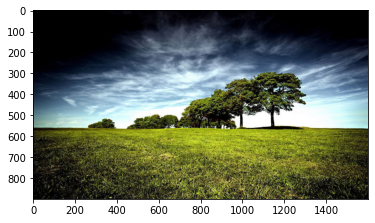

## Compressed image image1.png. k=2. File size 118K

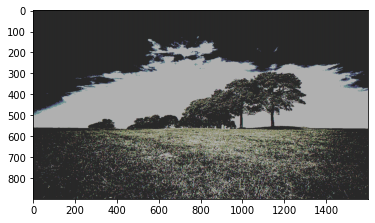

## Compressed image image1.png. k=8. File size 427K

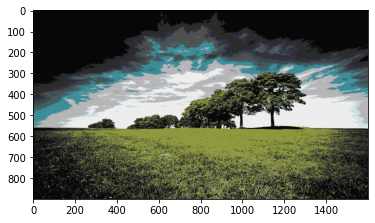

## Compressed image image1.png. k=64. File size 1,345K

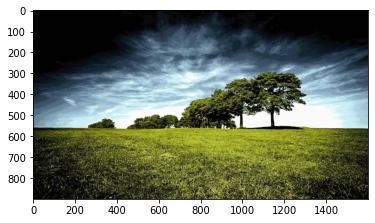

# Processing Image2

---

## Original image image2.png. File size 2,810K

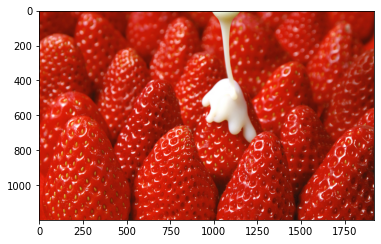

## Compressed image image2.png. k=2. File size 39K

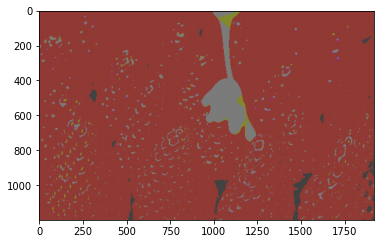

## Compressed image image2.png. k=8. File size 166K

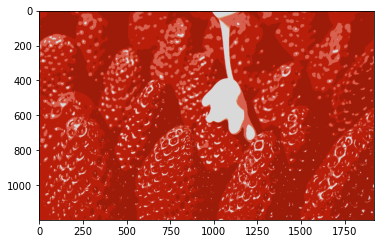

## Compressed image image2.png. k=64. File size 950K

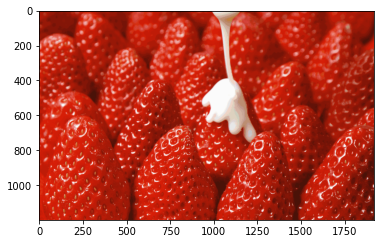

# Processing Image5

---

## Original image image5.png. File size 2,272K

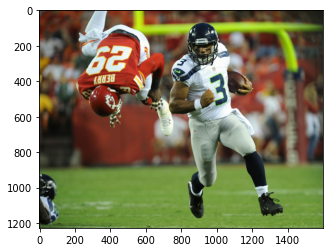

## Compressed image image5.png. k=2. File size 68K

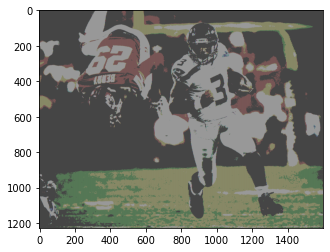

## Compressed image image5.png. k=8. File size 225K

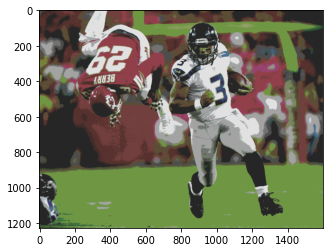

## Compressed image image5.png. k=64. File size 685K

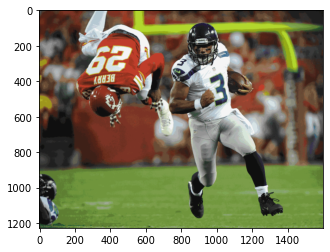

In [ ]:
printmd("# Processing Image1")
printHorizontalRule()
process_image('image1')
printmd("")
printmd("# Processing Image2")
printHorizontalRule()
process_image('image2')
printmd("")
printmd("# Processing Image5")
printHorizontalRule()
process_image('image5')
printmd("")


In [ ]:
def copy_quantized_file(file_name):
  printmd(f"* {file_name} --> {imagepath}/{file_name}")
  shutil.copy(file_name, os.path.join(imagepath, file_name))

# Copy quantized images to folder
printmd('# Copying quantized images')
copy_quantized_file('image1_k8.png')
copy_quantized_file('image2_k8.png')
copy_quantized_file('image5_k8.png')
printmd("")


# Copying quantized images

* image1_k8.png --> quantizedImages/image1_k8.png

* image2_k8.png --> quantizedImages/image2_k8.png

* image5_k8.png --> quantizedImages/image5_k8.png